In [ ]:
#MNIST
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

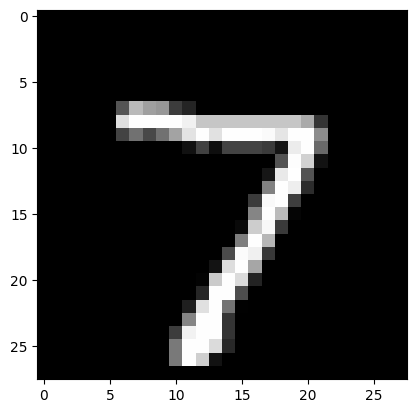

In [ ]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [ ]:
## image data preprocessing

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [ ]:
# converting target columnn innto numeric thrugh catagorical
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
y_train_ohe.shape

(60000, 10)

In [ ]:
y_test_ohe.shape

(10000, 10)

In [ ]:
## MODEL BUILDING

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import L1L2

In [ ]:
model = Sequential()

In [ ]:
model.add(Input(784))
# model.add(Dropout(0.25))
model.add(Dense(256, activation='relu')) #kernel_regularizer = L1L2(l1 = 0, l2 = 1)
model.add(Dense(10, activation='softmax'))
# with lasso regularization and elasticNET the model is underfitting
# with ridge i is performinngn efficiently

In [ ]:
model.compile(optimizer= "Adam", loss = "categorical_crossentropy", metrics = 'accuracy')

In [ ]:
history = model.fit(x=x_train, y=y_train_ohe, epochs = 30, validation_data = (x_test, y_test_ohe), batch_size  = 1000)

Epoch 1/30
60/60 [==============================] - 3s 39ms/step - loss: 0.6454 - accuracy: 0.8306 - val_loss: 0.2998 - val_accuracy: 0.9144
Epoch 2/30
60/60 [==============================] - 2s 37ms/step - loss: 0.2670 - accuracy: 0.9255 - val_loss: 0.2290 - val_accuracy: 0.9353
Epoch 3/30
60/60 [==============================] - 2s 29ms/step - loss: 0.2097 - accuracy: 0.9418 - val_loss: 0.1864 - val_accuracy: 0.9489
Epoch 4/30
60/60 [==============================] - 3s 53ms/step - loss: 0.1719 - accuracy: 0.9523 - val_loss: 0.1604 - val_accuracy: 0.9552
Epoch 5/30
60/60 [==============================] - 2s 39ms/step - loss: 0.1458 - accuracy: 0.9598 - val_loss: 0.1409 - val_accuracy: 0.9595
Epoch 6/30
60/60 [==============================] - 2s 27ms/step - loss: 0.1246 - accuracy: 0.9656 - val_loss: 0.1295 - val_accuracy: 0.9621
Epoch 7/30
60/60 [==============================] - 2s 26ms/step - loss: 0.1089 - accuracy: 0.9697 - val_loss: 0.1162 - val_accuracy: 0.9645
Epoch 8/30
60

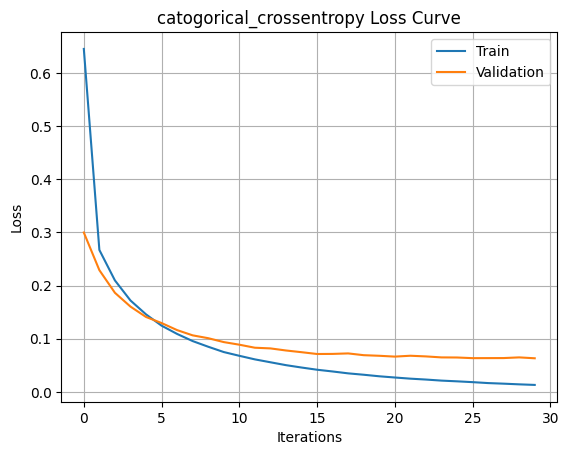

In [ ]:
history = model.history.history
train_loss = history['loss']
val_loss = history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(["Train", "Validation"])
plt.xlabel('Iterations')
plt.ylabel("Loss")
plt.grid()
plt.title("catogorical_crossentropy Loss Curve")
plt.show()

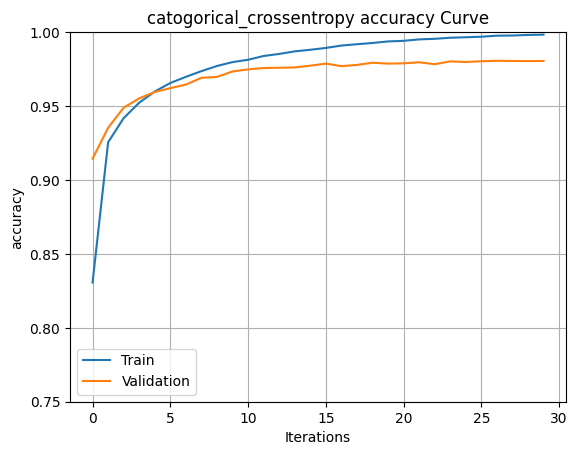

In [ ]:
history = model.history.history
train_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.75,1)
plt.legend(["Train", "Validation"])
plt.xlabel('Iterations')
plt.ylabel("accuracy")
plt.grid()
plt.title("catogorical_crossentropy accuracy Curve")
plt.show()

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
import numpy as np
y_pred = model.predict(x_test)
a = np.argmax(y_pred, axis=1)
print(a)

313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


In [ ]:
y_pred.flatten()

array([5.3312068e-08, 5.3462723e-10, 8.6847155e-07, ..., 1.3872876e-15,
       9.1547735e-11, 3.0598821e-10], dtype=float32)

In [ ]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(784, 256) dtype=float32, numpy=
 array([[ 0.05577603, -0.07007194, -0.05244963, ..., -0.05562106,
         -0.0593107 , -0.03515086],
        [-0.02463203, -0.04091067,  0.04475388, ...,  0.00180632,
          0.01843791, -0.00259666],
        [-0.04398376, -0.01886467, -0.02852069, ...,  0.06391929,
          0.01380353,  0.01817273],
        ...,
        [ 0.04687019, -0.01746213,  0.03595526, ...,  0.07308994,
         -0.06913258,  0.0630078 ],
        [-0.05028635, -0.05551396,  0.04998592, ..., -0.01326505,
         -0.06785273,  0.0608086 ],
        [ 0.01694622, -0.00429722, -0.0192314 , ..., -0.06516116,
         -0.05776732,  0.050209  ]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(256,) dtype=float32, numpy=
 array([ 0.01335155, -0.06847305,  0.05767104,  0.02080263,  0.02985284,
         0.01923282,  0.08589944,  0.00994668,  0.08515479, -0.01819601,
         0.02793024,  0.1041666 , -0.0083299 ,  0.07252348,  0.02132663,


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
